# Image Enhancement - Image Histogram

Importing required packages necessary for image processing

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

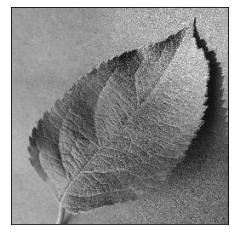

In [9]:
img = cv2.imread('/content/0bb2ddc5-d1f4-4fc2-be6b-6b63c60790df___RS_HL 7550.JPG', 0)
plt.imshow(img, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

#1. Histogram of an image

cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) 

**images** : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".

**channels** : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.

**mask** : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)

**histSize** : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].

**ranges** : this is our RANGE. Normally, it is [0,256].

Text(0, 0.5, 'Frequency')

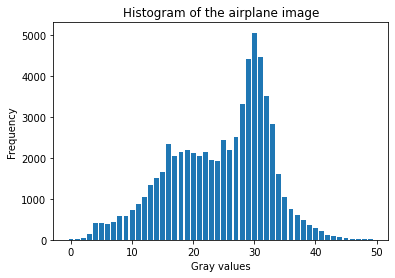

In [10]:
hist = cv2.calcHist([img],[0],None,[50],[0,256])
plt.bar(range(50), hist.ravel())
plt.title('Histogram of the airplane image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

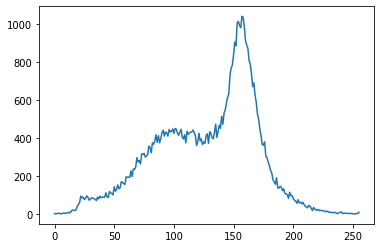

In [11]:
hist,bins = np.histogram(img.ravel(),256,[0,256])  #Alternate method
plt.plot(hist)

Another Example

In [14]:
high = cv2.imread('/content/0adc1c5b-8958-47c0-a152-f28078c214f1___RS_HL 7825.JPG')
low = cv2.imread('/content/0afaaf78-6ec5-49ee-a070-f6217039ed2d___RS_HL 7827.JPG')

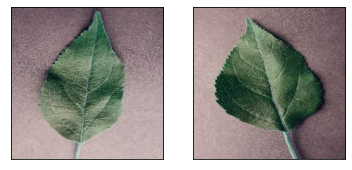

In [15]:
plt.subplot(121), plt.imshow(high)
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(low)
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.show()

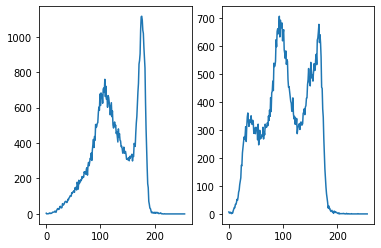

In [16]:
hist_high = cv2.calcHist([high],[2],None,[256],[0,256])
hist_low = cv2.calcHist([low],[2],None,[256],[0,256])
plt.subplot(121)
plt.plot(hist_high)
plt.subplot(122)
plt.plot(hist_low)
plt.show()

# 2. Cumulative histogram of an image
Calculate cumulative distribution function (CDF) of an image

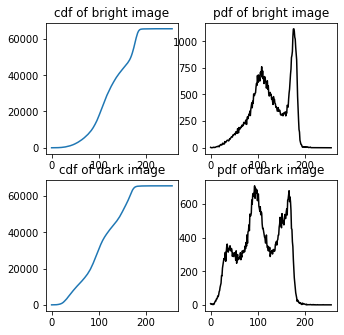

In [17]:
cdf_low = hist_low.cumsum()
cdf_high = hist_high.cumsum()
plt.subplot(221), plt.plot(cdf_high), plt. title('cdf of bright image')
plt.subplot(222), plt.plot(hist_high, 'k'), plt. title('pdf of bright image')
plt.subplot(223), plt.plot(cdf_low), plt. title('cdf of dark image')
plt.subplot(224), plt.plot(hist_low, 'k'), plt. title('pdf of dark image')
plt.subplots_adjust(bottom=2, right=0.8, top=3)
plt.show()

# 3. Histogram Manipulation
To continue image manipulation, first we need to change the RGB images to grayscale using cv2.cvtColor().

In [19]:
low_gray = cv2.cvtColor(low, cv2.COLOR_BGR2GRAY)
high_gray = cv2.cvtColor(high, cv2.COLOR_BGR2GRAY)

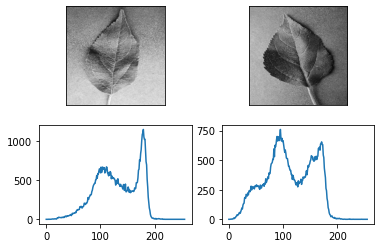

In [20]:
plt.subplot(221), plt.imshow(high_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.plot(cv2.calcHist([high_gray],[0],None,[256],[0,256]))

plt.subplot(222), plt.imshow(low_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256]))
plt.show()

# 3.i) Brightness

In order to change the brightness and contrast of an image, two parameters are often used as alpha and beta for contrast and brightness, respectively.


manip_image(image, alpha, beta) function gets alpha and beta and produces the output image.

Below, we just manipulate the brightness value (beta) and leave alpha=1 . We will return to changingbeta in the next section; beta will manipulate image contrast.

In [21]:
def manip_image(image, alpha, beta): 
  new_image = np.zeros(image.shape, image.dtype) 
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        new_image[y,x] = np.clip(alpha*image[y,x] + beta, 0, 255) 
  return new_image

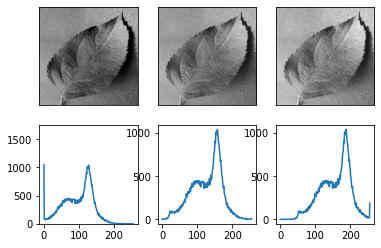

In [22]:
bright = manip_image(img, 1, 30)
dark = manip_image(img, 1, -30)
plt.figure()
plt.subplot(231), plt.imshow(dark, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(bright, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(234)
plt.plot(cv2.calcHist([dark],[0],None,[256],[0,256])), plt.ylim((0, 1750))
plt.subplot(235)
plt.plot(cv2.calcHist([img],[0],None,[256],[0,256]))
plt.subplot(236)
plt.plot(cv2.calcHist([bright],[0],None,[256],[0,256]))

You can see the histogram forward and backward shifts. When we increase and decrease brightness, histogram moves to brighter and darker regions, respectively.

([<matplotlib.lines.Line2D at 0x7f89507fbe10>], (0.0, 1100.0))

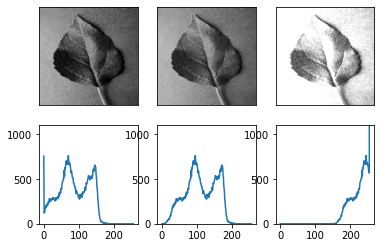

In [23]:
l_bright = manip_image(low_gray, 1, 150)
l_dark = manip_image(low_gray, 1, -25)
plt.figure()
plt.subplot(231), plt.imshow(l_dark, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(low_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(l_bright, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(234)
plt.plot(cv2.calcHist([l_dark],[0],None,[256],[0,256])), plt.ylim((0, 1100))
plt.subplot(235)
plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256])), plt.ylim((0, 1100))
plt.subplot(236)
plt.plot(cv2.calcHist([l_bright],[0],None,[256],[0,256])), plt.ylim((0, 1100))

# 3.ii) Contrast
Contrast of an image could be defined in different ways. One simple rule of thumb is to behave contrast as the distance between largest and smallest values in an image. In fact, the more the gray values are distributed over the  range, the more the contrast will be.

A uniform histogram with values distributed uniformly all over the intensity range will have the highest contrast. This will be the concept of our next section, Histogram equalization.

(0.0, 1750.0)

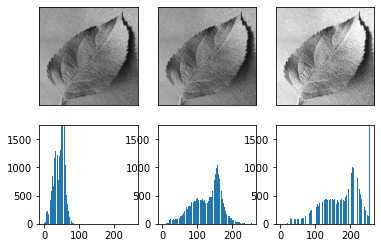

In [24]:
increase_contrast = manip_image(img, 1.35, 0)
decrease_contrast = manip_image(img, 0.35, 0)
plt.figure()
plt.subplot(231), plt.imshow(decrease_contrast, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(increase_contrast, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(234)
plt.bar(range(256), 
        cv2.calcHist([decrease_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))
plt.subplot(235)
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))
plt.subplot(236)
plt.bar(range(256),
        cv2.calcHist([increase_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

# Histogram Equalization
One usual method to stretch the intensity values of an image in order to make its histogram similar to the perfect histogram shape (uniformly distributed), is the histogram equalization. In this method, image histogram will be stretched with respect to its cumulative distribution function. Very good explanation of histogram equalization is found in here.

**cv2.equalizeHist(src[, dst])**

**src** : the only required argument is the original image to be equalized.

<BarContainer object of 256 artists>

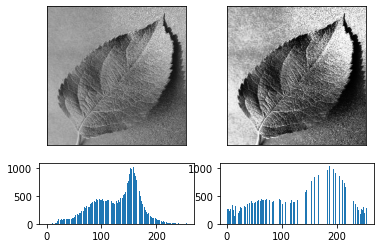

In [25]:
img_eq = cv2.equalizeHist(img)
grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)
plt.subplot(grid[:2, :2])
plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(grid[:2, 2:])
plt.imshow(img_eq, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(grid[2, :2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())
plt.subplot(grid[2, 2:])
plt.bar(range(256),
        cv2.calcHist([img_eq],[0],None,[256],[0,256]).ravel())

# CLAHE- Contrast Limited Adaptive Histogram Equalization
As you can see above, some parts of the image are brighter than the other parts in the equalized image. In order to reduce these artifacts in image enhancement, an adaptive algorithm was developed. This algorithm performs the same histogram equalization, but in small tiles of the image; resulting in better visual feelings.

To perform CLAHE, a CLAHE object should be created first. Then it is applied over the image. Two parameters, the tile number and limit should be specified.

You can try different tile sizes and limits and check the enhancement of image.

<BarContainer object of 256 artists>

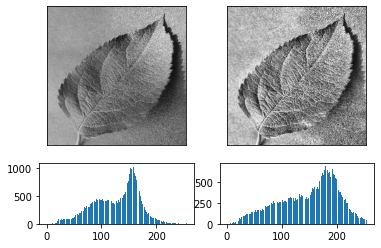

In [26]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
img_cl = clahe.apply(img)
grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)
plt.subplot(grid[:2, :2])
plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(grid[:2, 2:])
plt.imshow(img_cl, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(grid[2, :2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())
plt.subplot(grid[2, 2:])
plt.bar(range(256),
        cv2.calcHist([img_cl],[0],None,[256],[0,256]).ravel())